# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=True, enhanced=False)


Loading dataset:   0%|          | 0/2 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 2/2 [00:17<00:00,  8.81s/it]


# Methods

In [5]:
def plot_incidents_over_years(dataframe: pd.DataFrame, x_lim_left: str = None):
    daily_incidents = dataframe.groupby(dataframe['time_call_received'].dt.date).size()

    plt.figure(figsize=(12, 6))
    plt.plot(daily_incidents.index, daily_incidents.values)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    if x_lim_left is not None:
        plt.xlim(pd.Timestamp(x_lim_left), daily_incidents.index.max())

    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.title('Total Incidents Per Day Over Years')

    plt.grid(True)
    plt.show()


In [6]:
def print_year_occurrences(dataframe: pd.DataFrame):
    print(dataframe["time_call_received"].dt.year.value_counts())


# Main

In [7]:
dataframe = data_loader.processed_incidents_df.copy()

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754811 entries, 0 to 754810
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   triage_impression_during_call  754802 non-null  object        
 1   resource_id                    754811 non-null  object        
 2   resource_type                  754811 non-null  object        
 3   time_call_received             754811 non-null  datetime64[ns]
 4   time_call_processed            754811 non-null  datetime64[ns]
 5   time_ambulance_notified        754333 non-null  datetime64[ns]
 6   time_dispatch                  731707 non-null  datetime64[ns]
 7   time_arrival_scene             665649 non-null  datetime64[ns]
 8   time_departure_scene           560737 non-null  datetime64[ns]
 9   time_arrival_hospital          557995 non-null  datetime64[ns]
 10  time_available                 754747 non-null  datetime64[ns]
 11  

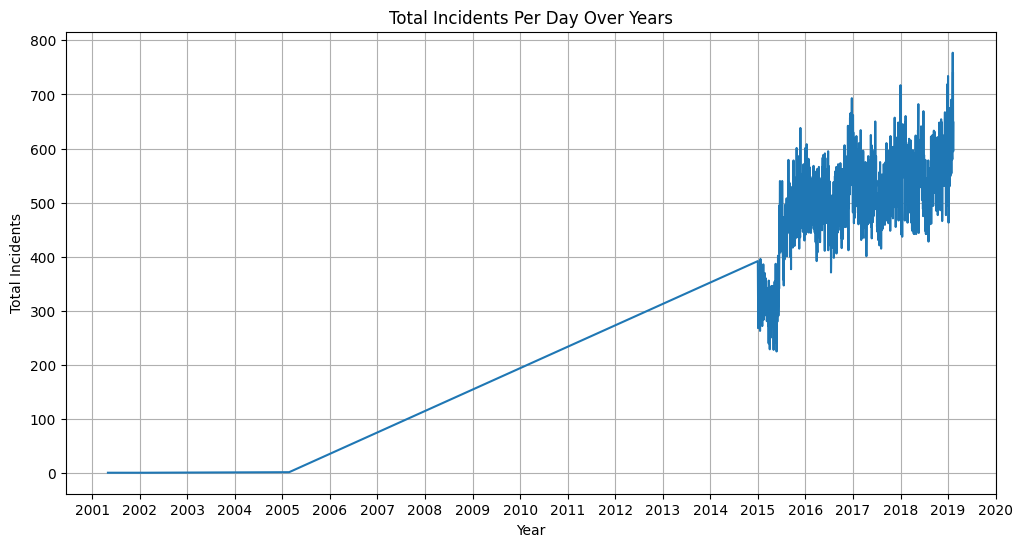

time_call_received
2018    201675
2017    193086
2016    185976
2015    147880
2019     26190
2005         2
2001         1
2002         1
Name: count, dtype: int64


In [8]:
plot_incidents_over_years(dataframe)
print_year_occurrences(dataframe)


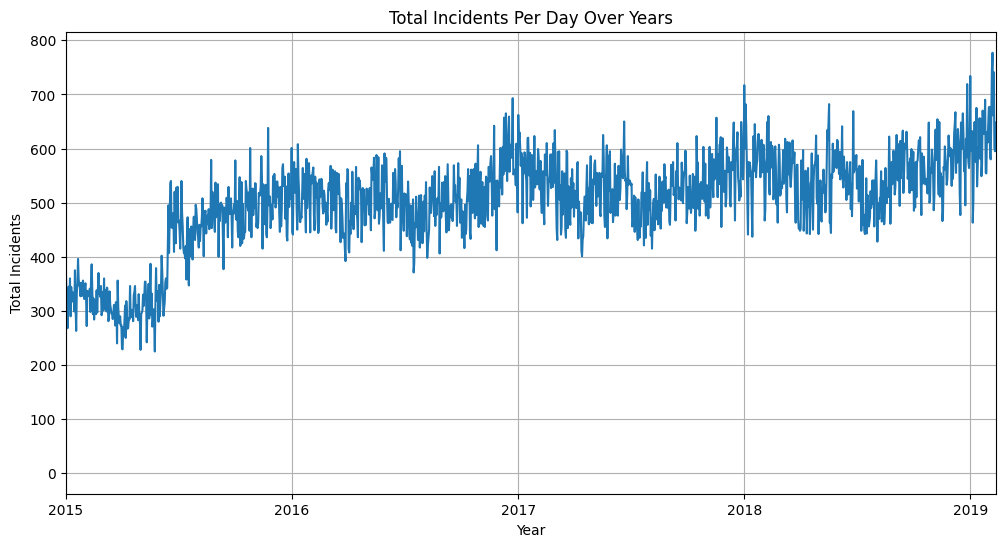

In [9]:
plot_incidents_over_years(dataframe, x_lim_left="2015-01-01")

In [10]:
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_duplicates(dataframe)

dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 555240 entries, 5199 to 754810
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   triage_impression_during_call  555231 non-null  object        
 1   resource_id                    555240 non-null  object        
 2   resource_type                  555240 non-null  object        
 3   time_call_received             555240 non-null  datetime64[ns]
 4   time_call_processed            555240 non-null  datetime64[ns]
 5   time_ambulance_notified        554939 non-null  datetime64[ns]
 6   time_dispatch                  539467 non-null  datetime64[ns]
 7   time_arrival_scene             493393 non-null  datetime64[ns]
 8   time_departure_scene           416375 non-null  datetime64[ns]
 9   time_arrival_hospital          414308 non-null  datetime64[ns]
 10  time_available                 555217 non-null  datetime64[ns]
 11  gr

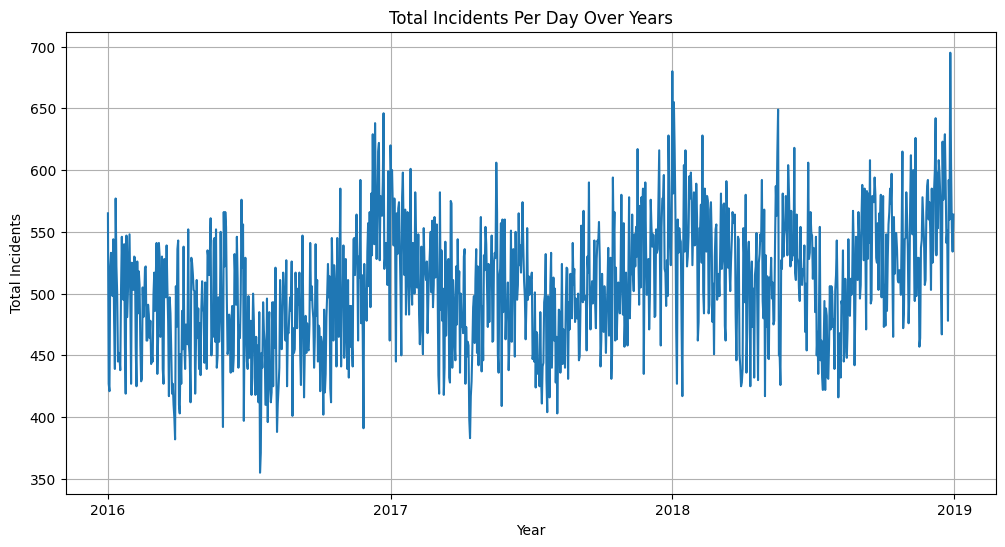

time_call_received
2018    192800
2017    184470
2016    177970
Name: count, dtype: int64


In [11]:
plot_incidents_over_years(dataframe)
print_year_occurrences(dataframe)
